In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.4368747224910566, 0.6747173483598752],
 'diameter': 46.00107109532129,
 'confidence': 0.9908743500709534,
 'timestamp': -547446.376332,
 'sphere': {'center': [5.232283032947718,
   -1.4191422625333032,
   40.14074317110588],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [132.74219741144643, 85.92226079896626],
  'axes': [175.33004367163616, 175.33004367163616],
  'angle': 0.0},
 'circle_3d': {'center': [-0.970528591326425,
   -3.5905005270519084,
   32.090256773323674],
  'normal': [-0.596865826834536, -0.2089390464211559, -0.7746584148111629],
  'radius': 2.283444877484764},
 'diameter_3d': 4.566889754969528,
 'ellipse': {'center': [83.87994671828287, 62.45426911490395],
  'axes': [35.96034929514304, 46.00107109532129],
  'angle': 24.33084128399065},
 'location': [83.87994671828287, 62.45426911490395],
 'model_confidence': 1.0,
 'theta': 1.7812862618327236,
 'phi': -2.2272819914515

Text(0.5, 0, 'Pupil timestamp (s)')

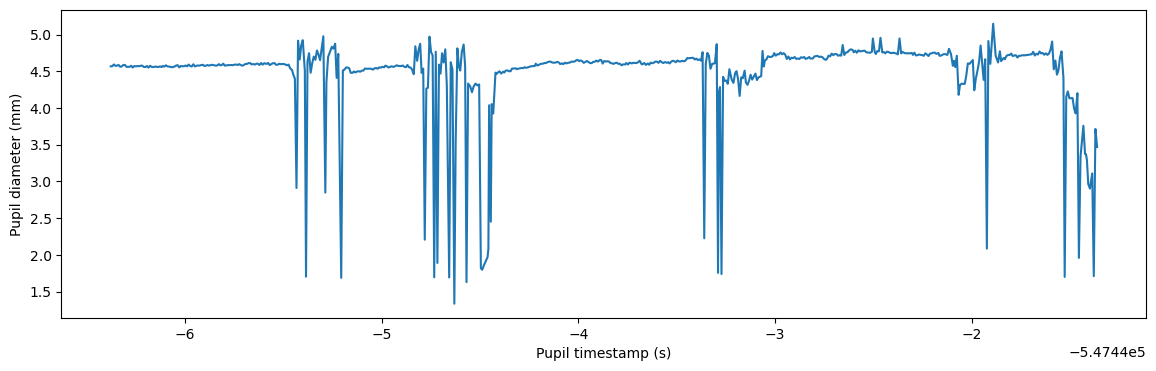

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')